# Chicago Dataset Preprocessing

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


# Importing the Datasets


In [2]:
df_2005_to_2007 = pd.read_csv('crimes-in-chicago/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)

df_2008_to_2011 = pd.read_csv('crimes-in-chicago/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)

df_2012_to_2017 = pd.read_csv('crimes-in-chicago/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

df_all_crimes = pd.concat([df_2005_to_2007, df_2008_to_2011, df_2012_to_2017], ignore_index=False, axis=0)

del(df_2005_to_2007,df_2008_to_2011,df_2012_to_2017)



b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


# Preprocessing

Now that we have the data lets dive into it and see what we have

In [3]:
df_all_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              int64
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(4), object(10)
memory usage: 1021.5+ MB


In [4]:
df_all_crimes.head(3)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"


So from the a quick look at the dataset there are 6,017,767 Instances and 23 features. However there is a lot to do with these features and instances. First lets start with cleaning up unwanted instances and see if the size can be reducted. 

## Instance Clean up

Now lets clean up some of the data here with a few quick steps
1. Remove duplicate instances
2. Remove Null values


In [5]:
#Remove duplicate instances
print("Instances before removing duplicates: " + str(len(df_all_crimes)))
df_all_crimes.drop_duplicates(subset=['ID'], inplace=True)
print("Instances after removing duplicates: " + str(len(df_all_crimes)))

Instances before removing duplicates: 6017767
Instances after removing duplicates: 4336556


With removing duplicate data from the dataset we were able to remove 1,681,211 instances that were repeated in the datset. That will make a big difference going foward.

Next we need to remove null values from the dataset. 


In [6]:
print("A count of features with the amount of null values they have")
df_all_crimes.isnull().sum()

A count of features with the amount of null values they have


Unnamed: 0                  0
ID                          0
Case Number                 4
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1952
Arrest                      0
Domestic                    0
Beat                        0
District                   47
Ward                       62
Community Area           1130
FBI Code                    0
X Coordinate            60207
Y Coordinate            60207
Year                        0
Updated On                  0
Latitude                60207
Longitude               60207
Location                60207
dtype: int64

In [7]:
df_all_crimes = df_all_crimes.dropna()
print("Instances after removing nulls: " + str(len(df_all_crimes)))

Instances after removing nulls: 4273756


taking care of the nulls removed 62,800 inscatnces from the datset leaving the dataset instances to be 4,273,756 over the given time period. 

Now that we have taken care of cleaning up the instances in the dataset its time to dive deeper into the features and pull out and organie the features we need
## Feature Extraction

First we will start by removing unwanted features that dont attribute any value to this dataset. 

In [8]:
print("Number of features before:" + str(len(df_all_crimes.keys())))
unwantedFeatures = ['Unnamed: 0', 'Case Number', 'IUCR', 'Beat', 'Ward', 'Community Area', 'FBI Code'
                    ,'X Coordinate','Y Coordinate', 'Updated On', 'Location']
df_all_crimes.drop(unwantedFeatures, axis=1, inplace=True)

print("Number of features after:" + str(len(df_all_crimes.keys())))


Number of features before:23
Number of features after:12


Now that we have removed the unwanted features lets take a look at what the dataset looks like now and see if we need
 to do any work to the remaining features. 

In [9]:
df_all_crimes.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4273756 entries, 0 to 1456713
Data columns (total 12 columns):
ID                      int64
Date                    object
Block                   object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
District                float64
Year                    int64
Latitude                float64
Longitude               float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 366.8+ MB


In [10]:
df_all_crimes.head(3)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,16.0,2006,41.981913,-87.771996
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,3.0,2006,41.775733,-87.611920
2,4673628,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,3.0,2006,41.769897,-87.593671


### Date:

Lets start by converting the data feature from an object to a datatime. We also want to pull out some of its featrues to do validation with. For instance we want to pull out the month, day and hour of the crime. After we have done that we will also index the dataset by the date so that we can use it to form some nice vizilization later on. 

In [11]:
df_all_crimes['Date'] = pd.to_datetime(df_all_crimes['Date'], format='%m/%d/%Y %I:%M:%S %p')



In [12]:
df_all_crimes['Month'] = df_all_crimes['Date'].map(lambda x: x.month)
df_all_crimes['Day'] = df_all_crimes['Date'].map(lambda x: x.day)
df_all_crimes['Hour'] = df_all_crimes['Date'].map(lambda x: x.hour)

In [13]:
df_all_crimes.set_index('Date', inplace=True)

In [14]:
# Exporting the data before any more changes are made for the prediction part.
df_all_crimes.to_csv('Chicago_Crime_Apriori.csv')

### Block

Lets move on to the next feature that we have and that is an object. Lets start by looking at the unique values in block and seeing if we need to do any orginization to the features values. 

In [15]:
df_all_crimes['Block'].nunique()

33969

Okay block is a string value that represents the block the crime took place on. To use this in a prediction model we will have to convert it into a classification feature and assign it a look up index. We will use sklearns LabelEncoder here to convert Block.  

In [16]:
df_all_crimes['Block'] = df_all_crimes['Block'].astype(str)

df_all_crimes['Block'] = LabelEncoder().fit(df_all_crimes['Block']).transform(df_all_crimes['Block'])


Okay perfect! Now block has been converted in to an int and can now be used in prediction models. 

### Primary Type

Next lets take a look at primary type and see what we can clean up here. This feature we will use to predict on later so we want to make sure that it is well organized. 

In [17]:
df_all_crimes['Primary Type'].nunique()

34

Text(0.5, 1.0, 'Number of Crimes per Primary Type')

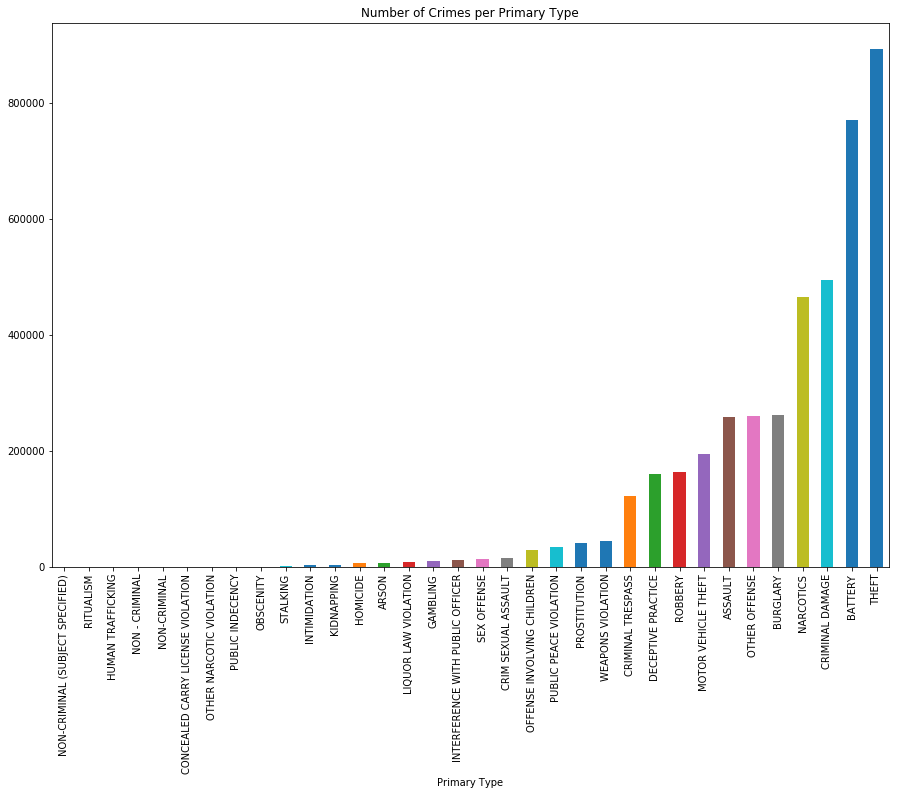

In [18]:
plt.figure(figsize=(15,10))


df_all_crimes.groupby([df_all_crimes['Primary Type']]).size().sort_values().plot(kind='bar')
plt.title('Number of Crimes per Primary Type')

As we can see from this the classification are really skewed here and it is top heavy. Lets do some Dimensinality 
reduction here and combine the 15 of the smaller count classes to be 1 class. That we we reduce the overall size of 
the classification while also giving our future prediction algorithms a better set of data to predict upon. 

In [19]:
primary_type_classes = df_all_crimes.groupby(['Primary Type']).size().reset_index()

primary_type_classes = primary_type_classes.sort_values([0]).head(15)

others = list(primary_type_classes['Primary Type'])

df_all_crimes.loc[df_all_crimes['Primary Type'].isin(others), 'Primary Type'] = 'Others'

Text(0.5, 1.0, 'Number of Crimes per Primary Type')

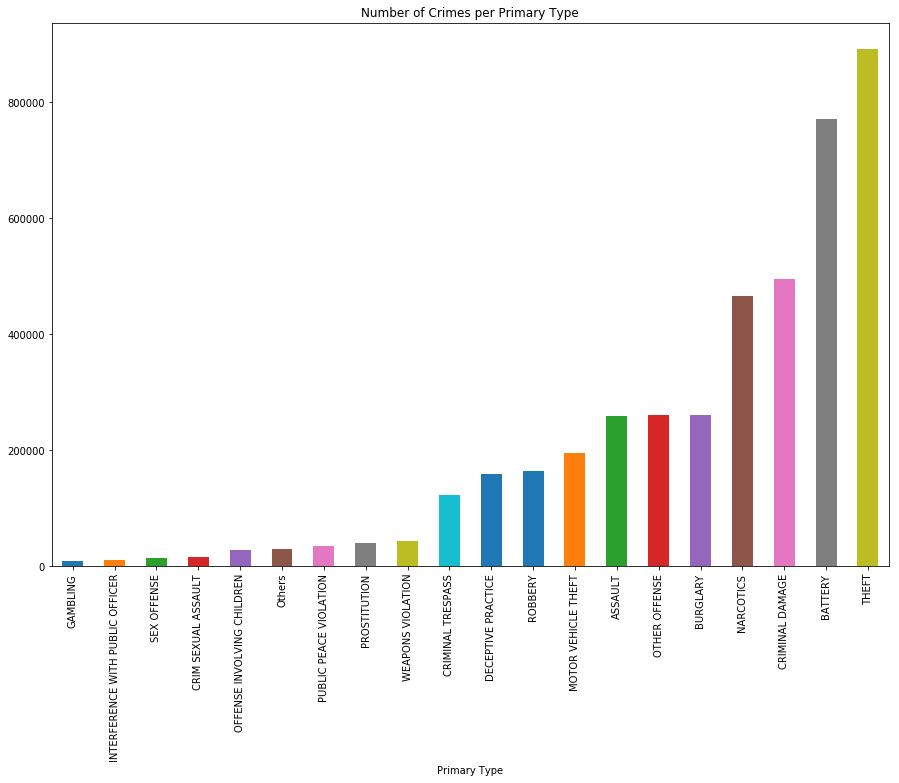

In [20]:
plt.figure(figsize=(15,10))

df_all_crimes.groupby([df_all_crimes['Primary Type']]).size().sort_values().plot(kind='bar')
plt.title('Number of Crimes per Primary Type')


There we go we have now reduced the size of the class and evened out the count for the classes. Lets now also export 
this to a CSV so that we can use it in some preidiction modeling. Now we need to also LabelEncode theses strings as well so that we can use them in prediction models. 



In [21]:
Primary_Type_Encoder = LabelEncoder()

df_all_crimes['Primary Type'] = df_all_crimes['Primary Type'].astype(str)

Primary_Type_Encoder.fit(df_all_crimes['Primary Type'])
df_all_crimes['Primary Type'] = Primary_Type_Encoder.transform(df_all_crimes['Primary Type'])


Text(0.5, 1.0, 'Number of Crimes per Primary Type')

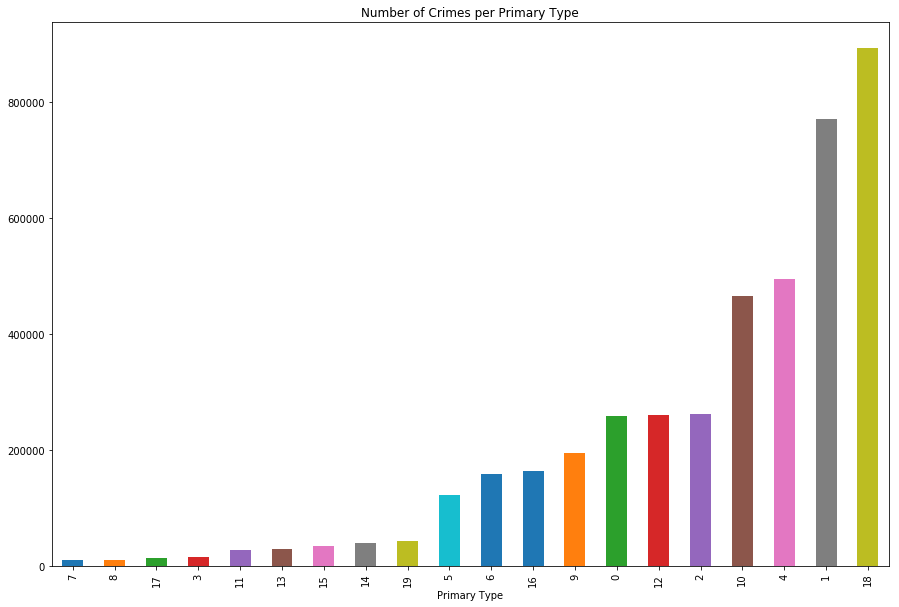

In [22]:
plt.figure(figsize=(15,10))

df_all_crimes.groupby([df_all_crimes['Primary Type']]).size().sort_values().plot(kind='bar')
plt.title('Number of Crimes per Primary Type')

Perfect! We are all set now with primary type.

### Description:
Lets now take a look at the description feature. This is also a string feture that will have to be converted to a classification feature. 

In [23]:
df_all_crimes['Description'].nunique()

370

In [24]:
df_all_crimes['Description'] = df_all_crimes['Description'].astype(str)

df_all_crimes['Description'] = LabelEncoder().fit(df_all_crimes['Description']).transform(df_all_crimes['Description'])


### Location Description

Last feature thats datatype needs to be fixed. This like the other objects is a string that needs to be repreented as a classification feature.

In [25]:
df_all_crimes['Location Description'].nunique()

159

Text(0.5, 1.0, 'Number of Crimes per ')

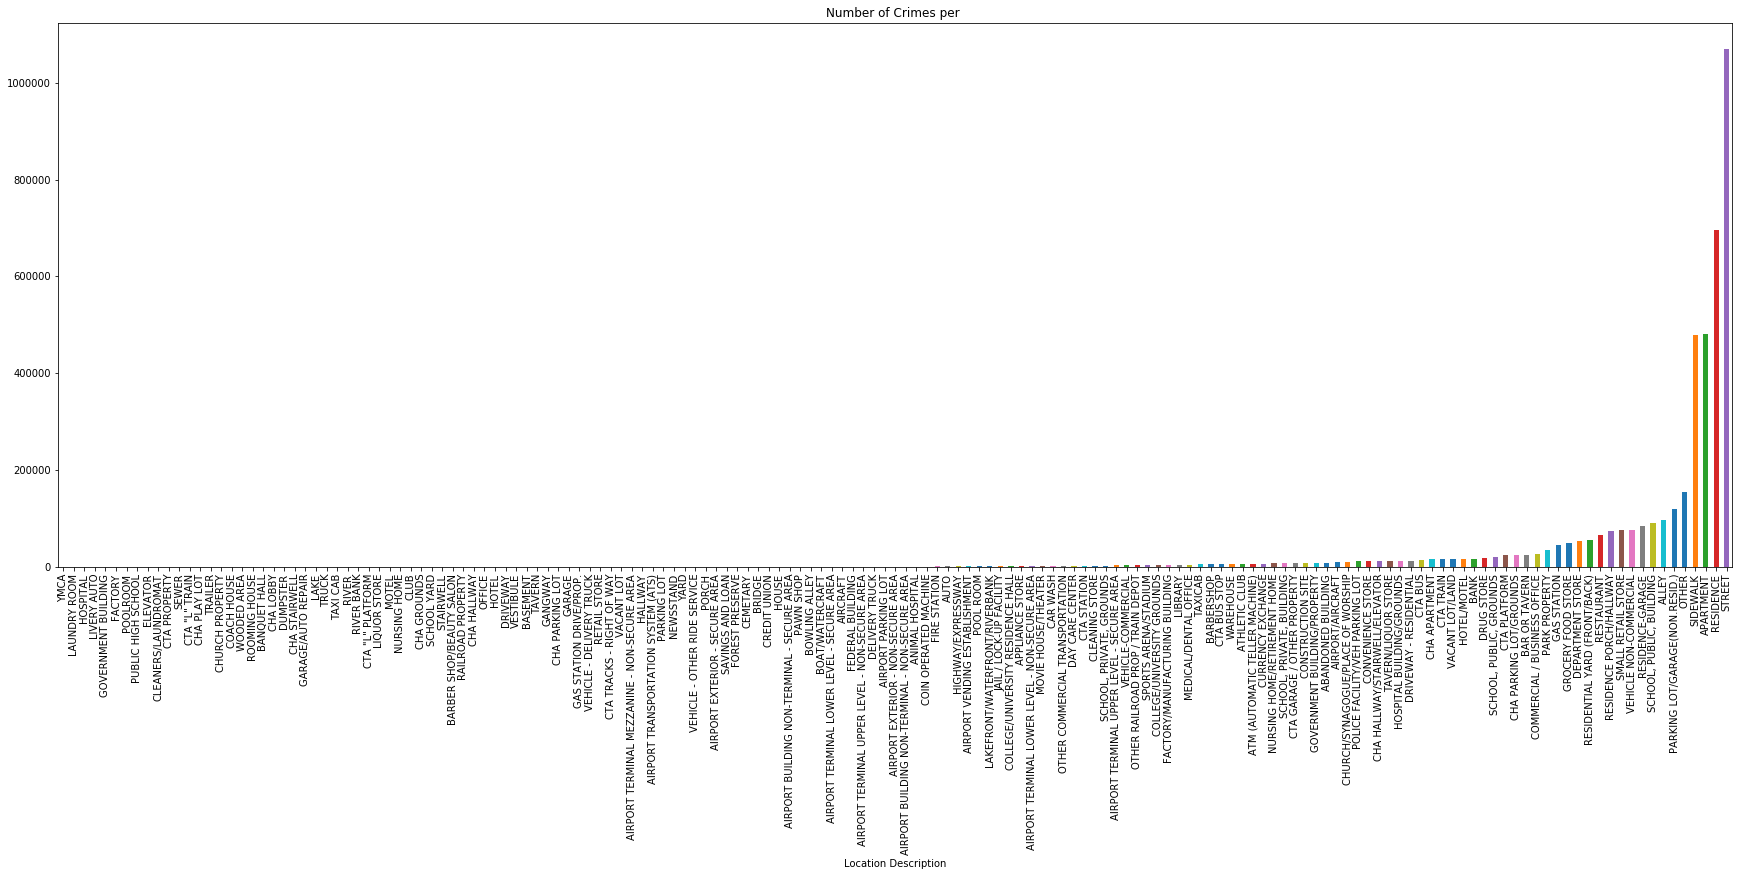

In [26]:
plt.figure(figsize=(30,10))

df_all_crimes.groupby([df_all_crimes['Location Description']]).size().sort_values().plot(kind='bar')
plt.title('Number of Crimes per ')

This feature is also heavily skewed so we will also combine lots of the lower terms here too. 

In [27]:
primary_type_classes = df_all_crimes.groupby(['Location Description']).size().reset_index()

primary_type_classes = primary_type_classes.sort_values([0]).head()

others = list(primary_type_classes['Location Description'])

df_all_crimes.loc[df_all_crimes['Location Description'].isin(others), 'Location Description'] = 'OTHER LOCATIONS'

Text(0.5, 1.0, 'Number of Crimes per ')

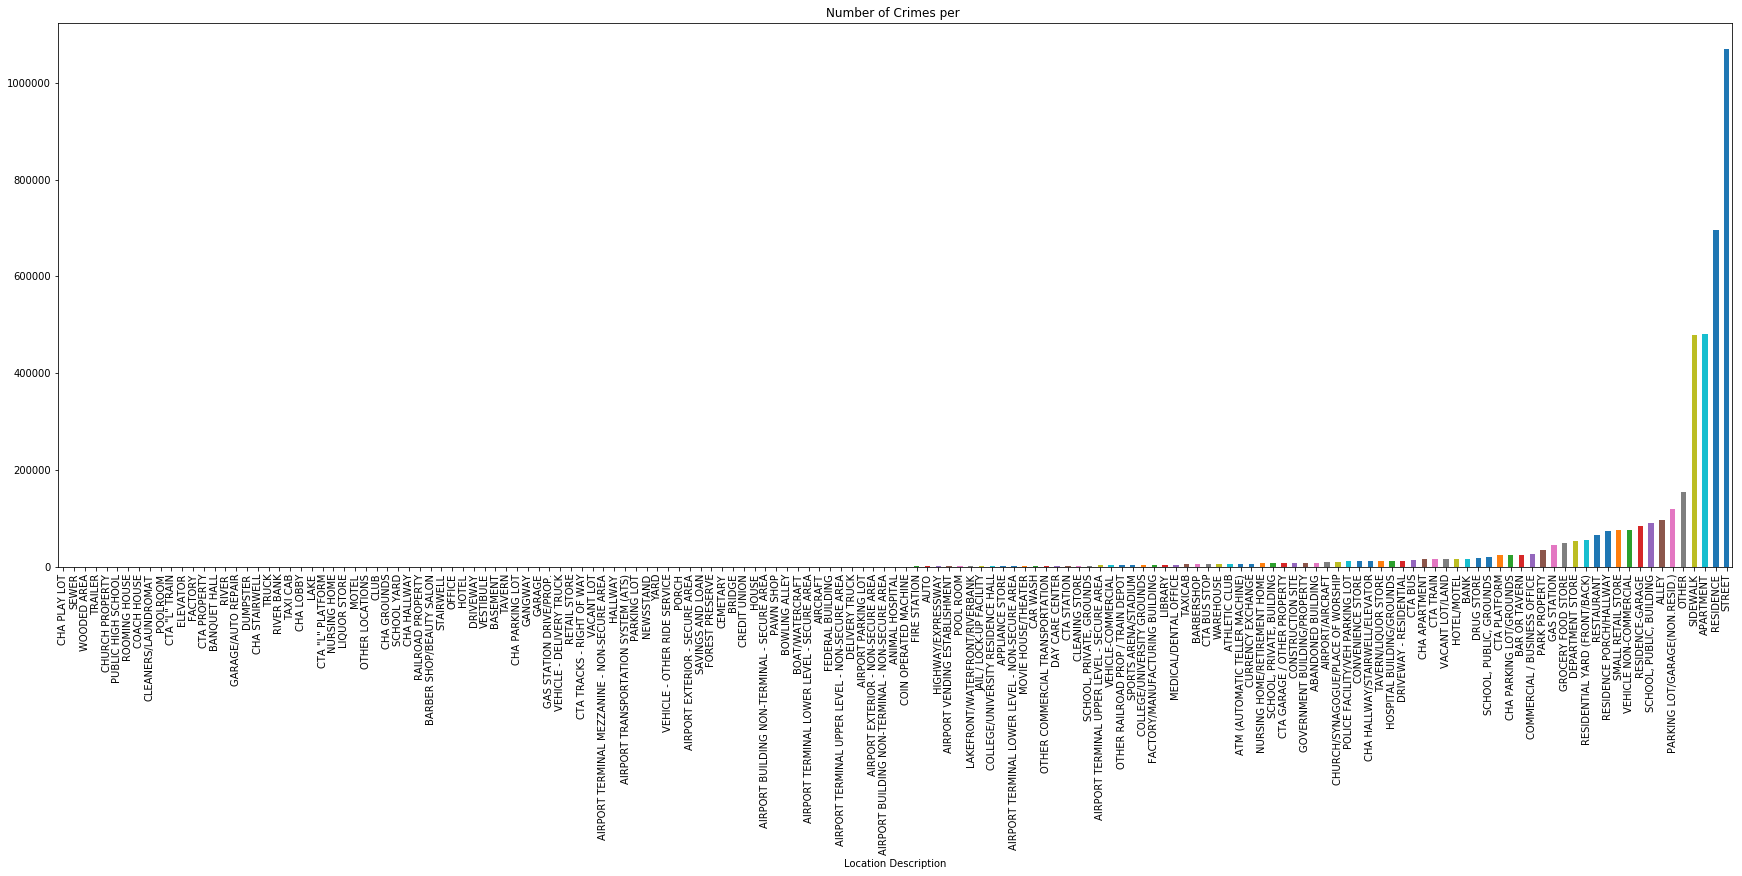

In [28]:
plt.figure(figsize=(30,10))

df_all_crimes.groupby([df_all_crimes['Location Description']]).size().sort_values().plot(kind='bar')
plt.title('Number of Crimes per ')

In [29]:
Location_Description_Encoder = LabelEncoder()

df_all_crimes['Location Description'] = df_all_crimes['Location Description'].astype(str)

Primary_Type_Encoder.fit(df_all_crimes['Location Description'])
df_all_crimes['Location Description'] = Primary_Type_Encoder.transform(df_all_crimes['Location Description'])

### Review Data
Now that we have finished leaning features and instances lets take a look at the data again

In [30]:
df_all_crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4273756 entries, 2006-04-02 13:00:00 to 2016-05-03 23:38:00
Data columns (total 14 columns):
ID                      int64
Block                   int64
Primary Type            int64
Description             int64
Location Description    int64
Arrest                  bool
Domestic                bool
District                float64
Year                    int64
Latitude                float64
Longitude               float64
Month                   int64
Day                     int64
Hour                    int64
dtypes: bool(2), float64(3), int64(9)
memory usage: 432.0 MB


In [31]:
df_all_crimes.head(4)

,ID,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Month,Day,Hour
Date,,,,,,,,,,,,,,
2006-04-02 13:00:00,4673626,23279,12,173,118,False,False,16.0,2006,41.981913,-87.771996,4,2,13
2006-02-26 13:40:48,4673627,26672,10,217,134,True,False,3.0,2006,41.775733,-87.611920,2,26,13
2006-01-08 23:16:00,4673628,6596,0,40,104,False,False,3.0,2006,41.769897,-87.593671,1,8,23
2006-04-05 18:45:00,4673629,25550,1,307,118,False,False,16.0,2006,41.942984,-87.780057,4,5,18


## Export Clean Data
Okay now that all of the features are fixed lets export the dataset so that we can now just call the cleaned version of the data!

In [32]:
df_all_crimes.to_csv('chicago_data_cleaned.csv')

In [35]:
df_all_crimes.head()

,ID,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Month,Day,Hour
Date,,,,,,,,,,,,,,
2006-04-02 13:00:00,4673626,23279,12,173,118,False,False,16.0,2006,41.981913,-87.771996,4,2,13
2006-02-26 13:40:48,4673627,26672,10,217,134,True,False,3.0,2006,41.775733,-87.611920,2,26,13
2006-01-08 23:16:00,4673628,6596,0,40,104,False,False,3.0,2006,41.769897,-87.593671,1,8,23
2006-04-05 18:45:00,4673629,25550,1,307,118,False,False,16.0,2006,41.942984,-87.780057,4,5,18
2006-02-17 21:03:14,4673630,17290,10,265,15,True,False,8.0,2006,41.784211,-87.716745,2,17,21
